In [1]:
#1. We chose to use case 1

#2 and 3. We think regression is the best way to predict the stock market price. And we'll use linear regression to do so. 
#In linear regression there is always an input variable (x) and an output variable (y), just like we're supposed to
#have(x = date and Y = price of the stock). It's also simple to use. Regression is used together with continuous data, just like we have 
#in our datasat. Classification is used when the output will be a discrete variable (e.g. yes/no, type of animal, up/down etc.)
#The ouput is a number, among an infinite amount of other numbers. Therefore it doesn't make sence to use classification.

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2
from sklearn.tree import DecisionTreeRegressor as DesTeeReg
from sklearn import preprocessing as prepros
from sklearn.ensemble import BaggingRegressor as BagReg

In [2]:
df = pd.read_csv("NAS.csv", sep=',', engine='python')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Not sure if it's Close or Adj Close. The assignment only says "Close value", but can see that other groups uses adj close
#and when searching on google, ppl use Adj Close. I asked TA, but didn't get any answer in time.
df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
df.head()

,Date,Adj Close
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
4,2003-12-24,NaN


In [4]:
#Dropping the rows where at least one element is missing
df.dropna(inplace = True)
#Remove null values
df.isnull().sum()

Date         0
Adj Close    0
dtype: int64

In [5]:
# Converts dates from strings to integers by mapping each date to an integer
dato = df['Date']
dato = pd.to_datetime(dato)
dato = dato.map(dt.datetime.toordinal)
dato = dato.to_frame()
dato

,Date
0,731567
1,731568
2,731571
3,731572
7,731578
...,...
4248,737710
4249,737711
4250,737712
4251,737713


In [6]:
x = dato
x

,Date
0,731567
1,731568
2,731571
3,731572
7,731578
...,...
4248,737710
4249,737711
4250,737712
4251,737713


In [7]:
y = df['Adj Close']
y

0       19.139799
1       18.454201
2       18.054300
3       17.425800
7       17.254400
          ...    
4248     0.676800
4249     0.600600
4250     0.626000
4251     0.605000
4252     0.610600
Name: Adj Close, Length: 4218, dtype: float64

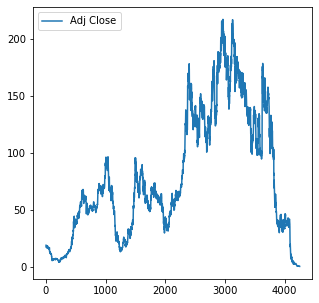

In [8]:
df.plot.line(y=['Adj Close'], figsize=(5,5))

In [9]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=1)

In [10]:
model = LinearRegression(normalize=True)
model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [11]:
print('Traning score: ', model.score(x_train, y_train))

Traning score:  0.24240742088319234


In [12]:
y_pred = model.predict(x_test)

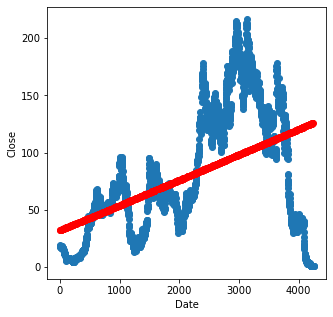

In [13]:
fig, ax = plt.subplots(figsize = (5,5))
plt.scatter(x_train.index, y_train)
plt.scatter(x_test.index,y_pred, color='r')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [14]:
prediction = model.predict([[731571]])
print('The prediction score for the chosen date is', prediction)

The prediction score for the chosen date is [32.42345225]
